In [50]:
import numpy as np
import cv2
import imutils
import csv
import argparse
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#Variables
bins = (8, 12, 3)
indexPath = "index001.csv"
databasePath = "DataBase"

#colorDiscripteur
def describe(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    features = []
    (h, w) = image.shape[:2]
    (cX, cY) = (int(w * 0.5), int(h * 0.5))
    segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h),
        (0, cX, cY, h)]
    (axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
    ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
    cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)

    for (startX, endX, startY, endY) in segments:
        cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
        cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
        cornerMask = cv2.subtract(cornerMask, ellipMask)
        hist = histogram(image, cornerMask)
        features.extend(hist)
    hist = histogram(image, ellipMask)
    features.extend(hist)

    return features

#Histogram
def histogram(image, mask):
    hist = cv2.calcHist([image], [0, 1, 2], mask, bins,
        [0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv2.normalize(hist).flatten()
    else:
        hist = cv2.normalize(hist, hist).flatten()

    return hist

#Sercher
def search(queryFeatures, limit = 3):
    results = {}
    with open(indexPath) as f:
        reader = csv.reader(f)

        for row in reader:
            features = [float(x) for x in row[1:]]
            d = chi2_distance(features, queryFeatures)
            results[row[0]] = d
        f.close()
    results = sorted([(v, k) for (k, v) in results.items()])

    return results[:limit]

def chi2_distance(histA, histB, eps = 1e-10):
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
        for (a, b) in zip(histA, histB)])

    return d

In [52]:
col_list = ['s' + str(x) for x in range(0,1441)]

In [53]:
databasePath = "DataBase"

output = open(indexPath, "w")

for imagePath in glob.glob(databasePath + "/*/*.jpg"):
    imageID = imagePath[imagePath.rfind("\\") + 1:]
    target = imagePath[imagePath.find("\\") + 1:imagePath.rfind("\\")]
    image = cv2.imread(imagePath)
    features = describe(image)
    #print(imageID)
    features = [str(f) for f in features]
    output.write("%s,%s\n" % (imageID+","+target, ",".join(features)))
output.close()

data = pd.read_csv('index001.csv')
print(data)
data.rename(columns={'obj_car': 'target'}, inplace=True)
print(data)
y = data.target
X_train = data.drop('target',1)
X_train.columns = col_list

      29000.jpg   obj_car  0.0027562855       0.0  0.033075426  0.013781427  \
0     29001.jpg   obj_car      0.140499  0.008265          0.0     0.024794   
1     29002.jpg   obj_car      0.000000  0.000000          0.0     0.000000   
2     29003.jpg   obj_car      0.000000  0.013344          0.0     0.000000   
3     29005.jpg   obj_car      0.000000  0.000000          0.0     0.000000   
4     29022.jpg   obj_car      0.000000  0.003921          0.0     0.000000   
..          ...       ...           ...       ...          ...          ...   
184  535093.jpg  obj_ship      0.000000  0.000000          0.0     0.000000   
185  535094.jpg  obj_ship      0.000000  0.000000          0.0     0.000000   
186  535096.jpg  obj_ship      0.000000  0.000000          0.0     0.003122   
187  535097.jpg  obj_ship      0.000000  0.000000          0.0     0.000000   
188  535098.jpg  obj_ship      0.000000  0.000000          0.0     0.000000   

     0.03031914  0.013781427.1  0.019293997  0.0413

C:\Users\Pc\AppData\Local\Temp/ipykernel_1400/3249891102.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = data.drop('target',1)


In [54]:
print(data.head())

   29000.jpg   target  0.0027562855       0.0  0.033075426  0.013781427  \
0  29001.jpg  obj_car      0.140499  0.008265          0.0     0.024794   
1  29002.jpg  obj_car      0.000000  0.000000          0.0     0.000000   
2  29003.jpg  obj_car      0.000000  0.013344          0.0     0.000000   
3  29005.jpg  obj_car      0.000000  0.000000          0.0     0.000000   
4  29022.jpg  obj_car      0.000000  0.003921          0.0     0.000000   

   0.03031914  0.013781427.1  0.019293997  0.04134428  ...  0.0.1135  \
0    0.028926            0.0     0.066117    0.024794  ...  0.000000   
1    0.000000            0.0     0.000000    0.000000  ...  0.000000   
2    0.224949            0.0     0.020970    0.848324  ...  0.050263   
3    0.007498            0.0     0.000000    0.003749  ...  0.023118   
4    0.094106            0.0     0.000000    0.000000  ...  0.022708   

   0.021208556.1  0.0.1136  0.0.1137  0.015424404.2  0.0.1138  0.0.1139  \
0       0.000000  0.000000  0.000000     

In [55]:
databasePath = "Test"

output = open(indexPath, "w")
ims = []
for imagePath in glob.glob(databasePath + "/*.jpg"):
    imageID = imagePath[imagePath.rfind("\\") + 1:]
    ims.append(imageID)
    image = cv2.imread(imagePath)

    features = describe(image)

    features = [str(f) for f in features]
    output.write("%s,%s\n" % (imageID, ",".join(features)))

output.close()

X_test = pd.read_csv('index001.csv')
X_test.columns = col_list

In [56]:
ims

['29011.jpg',
 '29013.jpg',
 '29055.jpg',
 '299367.jpg',
 '354001.jpg',
 '354053.jpg',
 '447012.jpg',
 '447063.jpg',
 '521022.jpg',
 '521079.jpg',
 '521090.jpg',
 '535000.jpg',
 '535010.jpg',
 '535015.jpg',
 '535031.jpg',
 '535041.jpg',
 '535078.jpg',
 '535082.jpg',
 '535091.jpg',
 '535095.jpg',
 '535099.jpg']

In [57]:
y[y=='obj_car']=1
y[y=='obj_ship']=0

X_test = X_test.drop('s0',1)
X_train = X_train.drop('s0',1)

X_train = X_train.replace('unknown',0)
X_test = X_test.replace('unknown',0)

y=y.astype('int')

C:\Users\Pc\AppData\Local\Temp/ipykernel_1400/3126785481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='obj_car']=1
C:\Users\Pc\AppData\Local\Temp/ipykernel_1400/3126785481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='obj_ship']=0
C:\Users\Pc\AppData\Local\Temp/ipykernel_1400/3126785481.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = X_test.drop('s0',1)
C:\Users\Pc\AppData\Local\Temp/ipykernel_1400/3126785481.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except

In [58]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

clf=svm.SVC(kernel='linear',verbose =True)

clf.fit(X_train,y)
Y_pred = clf.predict(X_test)

y_test = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
classe = []
for i in Y_pred:
    if i==1:
        classe.append('obj_car')
    else:
        classe.append('obj_ship')

[LibSVM]

In [59]:
databasePath = "Test"

output = open(indexPath, "w")
imageID = []
for imagePath in glob.glob(databasePath + "/*.jpg"):
    imageID.append(imagePath[imagePath.rfind("\\") + 1:])
    


result = pd.DataFrame({'name': imageID[1:] , 'classe': classe})
result.to_csv('result.csv',index=False)

In [60]:
len(classe)

20

In [61]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, Y_pred))

Precision: 1.0


In [62]:
print("Recall:",metrics.recall_score(y_test, Y_pred))

Recall: 0.9


0.95


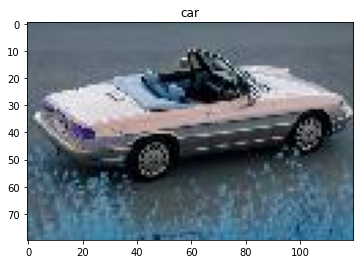

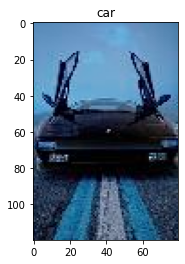

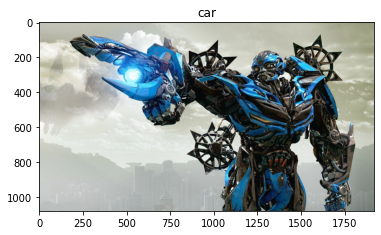

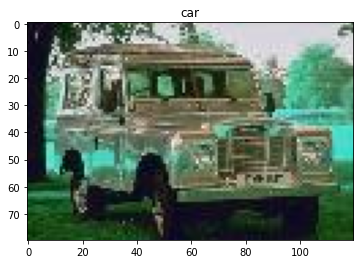

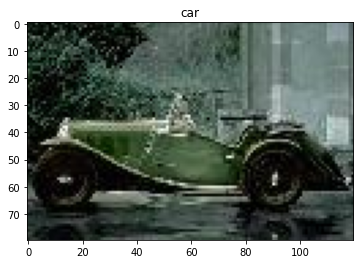

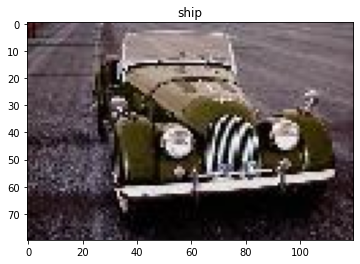

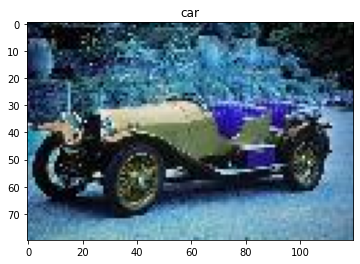

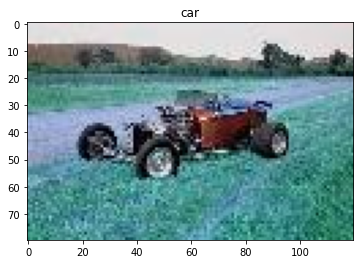

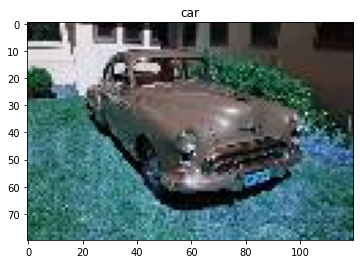

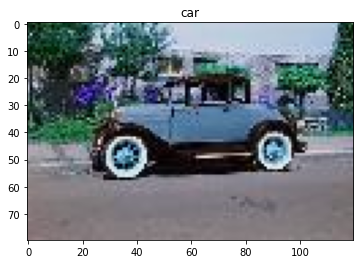

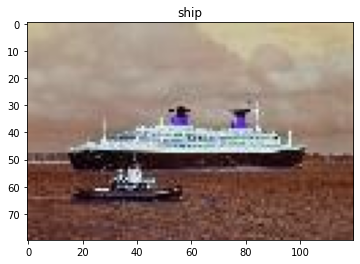

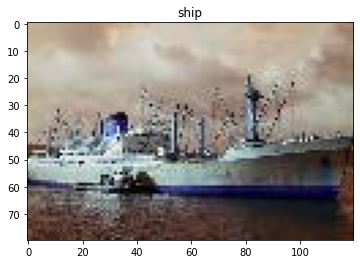

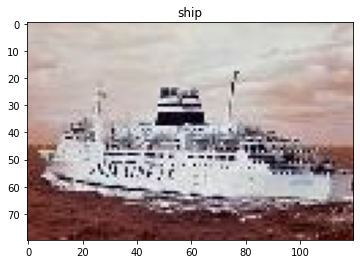

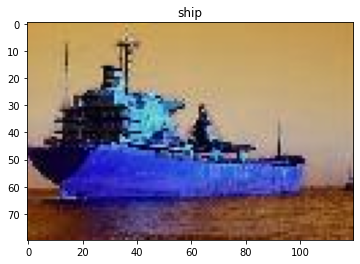

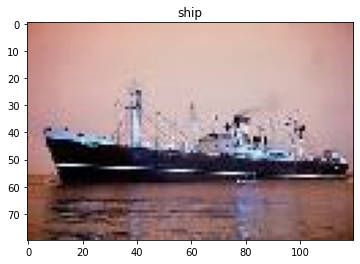

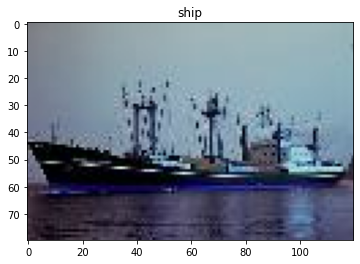

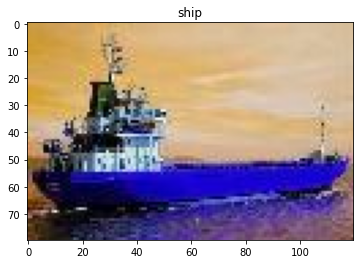

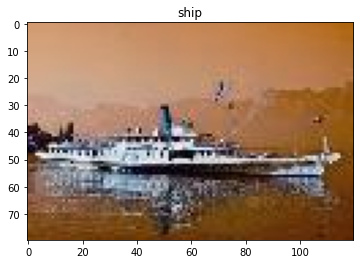

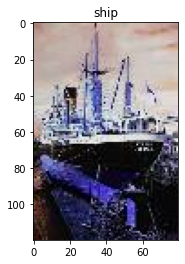

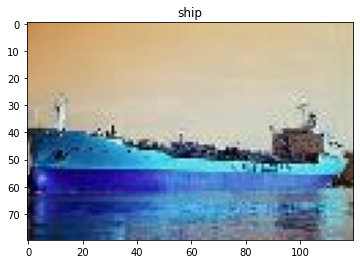

In [63]:
databasePath = "Test"

output = open(indexPath, "w")
imageID = []
for imagePath in glob.glob(databasePath + "/*.jpg"):
    imageID.append(imagePath[imagePath.rfind("\\") + 1:])
    
imageID = imageID[1:]

print(clf.score(X_test,y_test))
for i in range(len(imageID)):
    if Y_pred[i]==1:
        classe = 'car'
    else:
        classe = 'ship'
    img = cv2.imread("Test/"+imageID[i])
    plt.imshow(img)
    plt.title(classe)
    plt.show()